In [153]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import sklearn.metrics as sm
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn import model_selection
from sklearn.feature_selection import SelectKBest,chi2,f_classif
from sklearn.model_selection import KFold 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeClassifier
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from scipy.stats import kurtosis
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [4]:
conda install matplotlib

Solving environment: done

## Package Plan ##

  environment location: /Users/afifmazhar/opt/anaconda3/envs/myenv

  added / updated specs:
    - matplotlib


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    kiwisolver-1.4.2           |  py310he9d5cce_0          61 KB
    matplotlib-3.5.2           |  py310hecd8cb5_0           7 KB
    matplotlib-base-3.5.2      |  py310hfb0c5b7_0         5.7 MB
    pillow-9.2.0               |  py310hde71d04_1         642 KB
    ------------------------------------------------------------
                                           Total:         6.4 MB

The following NEW packages will be INSTALLED:

  brotli             pkgs/main/osx-64::brotli-1.0.9-hca72f7f_7 None
  brotli-bin         pkgs/main/osx-64::brotli-bin-1.0.9-hca72f7f_7 None
  cycler             pkgs/main/noarch::cycler-0.11.0-pyhd3eb1b0_0 None
  fonttools          pkgs/main/noarch::fonttools

In [55]:
# read dataset
df = pd.read_csv("credit_risk_dataset.csv")

In [56]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [57]:
df.shape

(32581, 12)

# Descriptive Statistical Analysis

In [58]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [59]:
#check for null values
df.isna().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [60]:
# separate numerical and categorical variables
numerical = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt','loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']
categorical = ['person_home_ownership', 'loan_intent','loan_grade','loan_status','cb_person_default_on_file']

array([[<AxesSubplot:title={'center':'person_age'}>,
        <AxesSubplot:title={'center':'person_income'}>,
        <AxesSubplot:title={'center':'person_emp_length'}>],
       [<AxesSubplot:title={'center':'loan_amnt'}>,
        <AxesSubplot:title={'center':'loan_int_rate'}>,
        <AxesSubplot:title={'center':'loan_percent_income'}>],
       [<AxesSubplot:title={'center':'cb_person_cred_hist_length'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

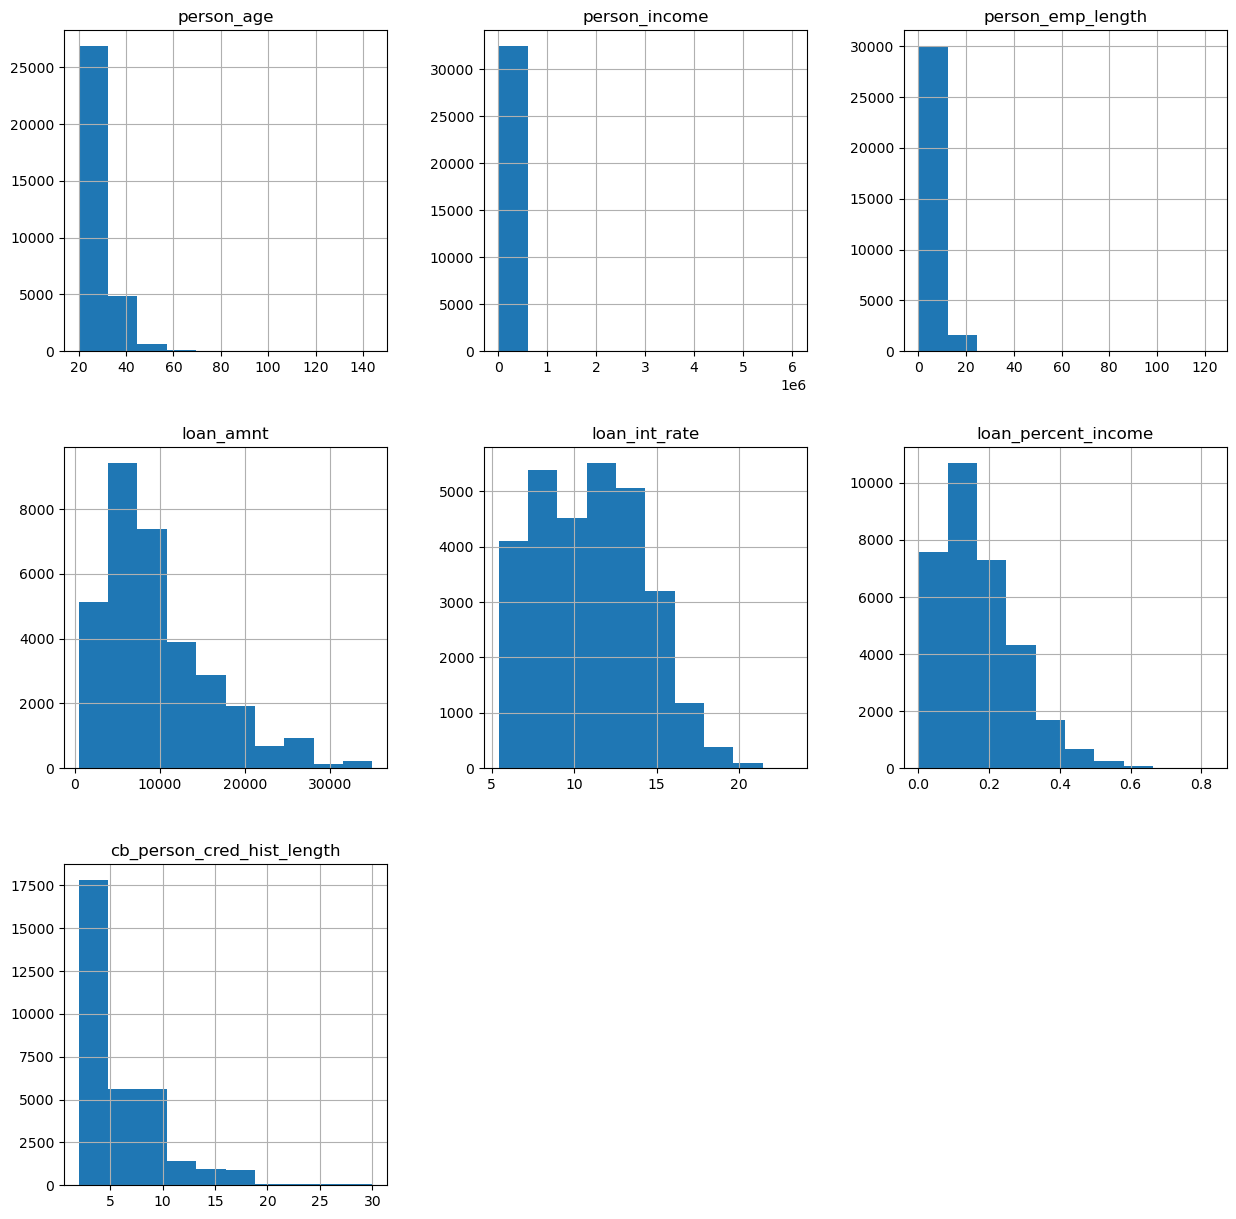

In [102]:
# quick histogram of numerical variables
df[numerical].hist(figsize=(15,15))

In [124]:
df.corr()

df['person_emp_length'].fillna((df['person_emp_length'].mean()), inplace=True)
df['loan_int_rate'].fillna((df['loan_int_rate'].mean()), inplace=True)
df['loan_percent_income'].fillna((df['loan_percent_income'].mean()), inplace=True)

df['person_emp_length'] = df['person_emp_length'].astype(int)
df['loan_int_rate'] = df['loan_int_rate'].astype(int)
df['loan_percent_income'] = df['loan_percent_income'].astype(int)

/var/folders/wf/w5z5sxp128s5m0sj281mzk280000gn/T/ipykernel_35317/3038499423.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(250, 15, as_cmap=True, center = "dark"),


<AxesSubplot:>

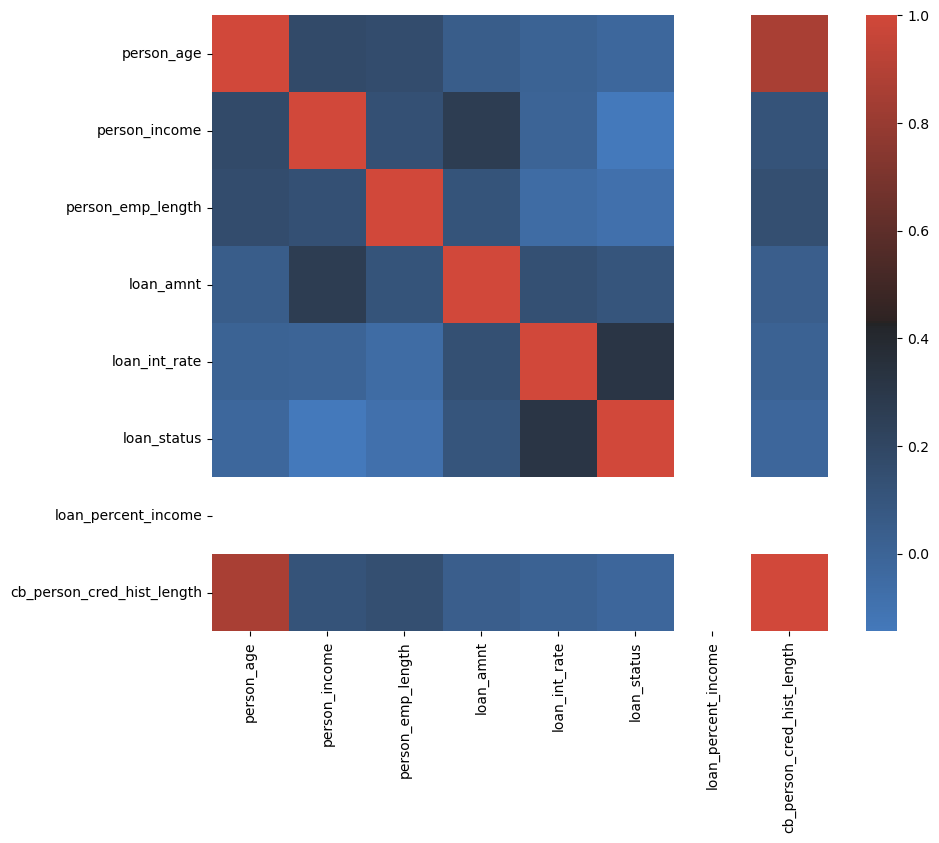

In [125]:
# heatmap of correlation between variables
f, ax = plt.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(250, 15, as_cmap=True, center = "dark"),
            square=True, ax=ax)

<AxesSubplot:>

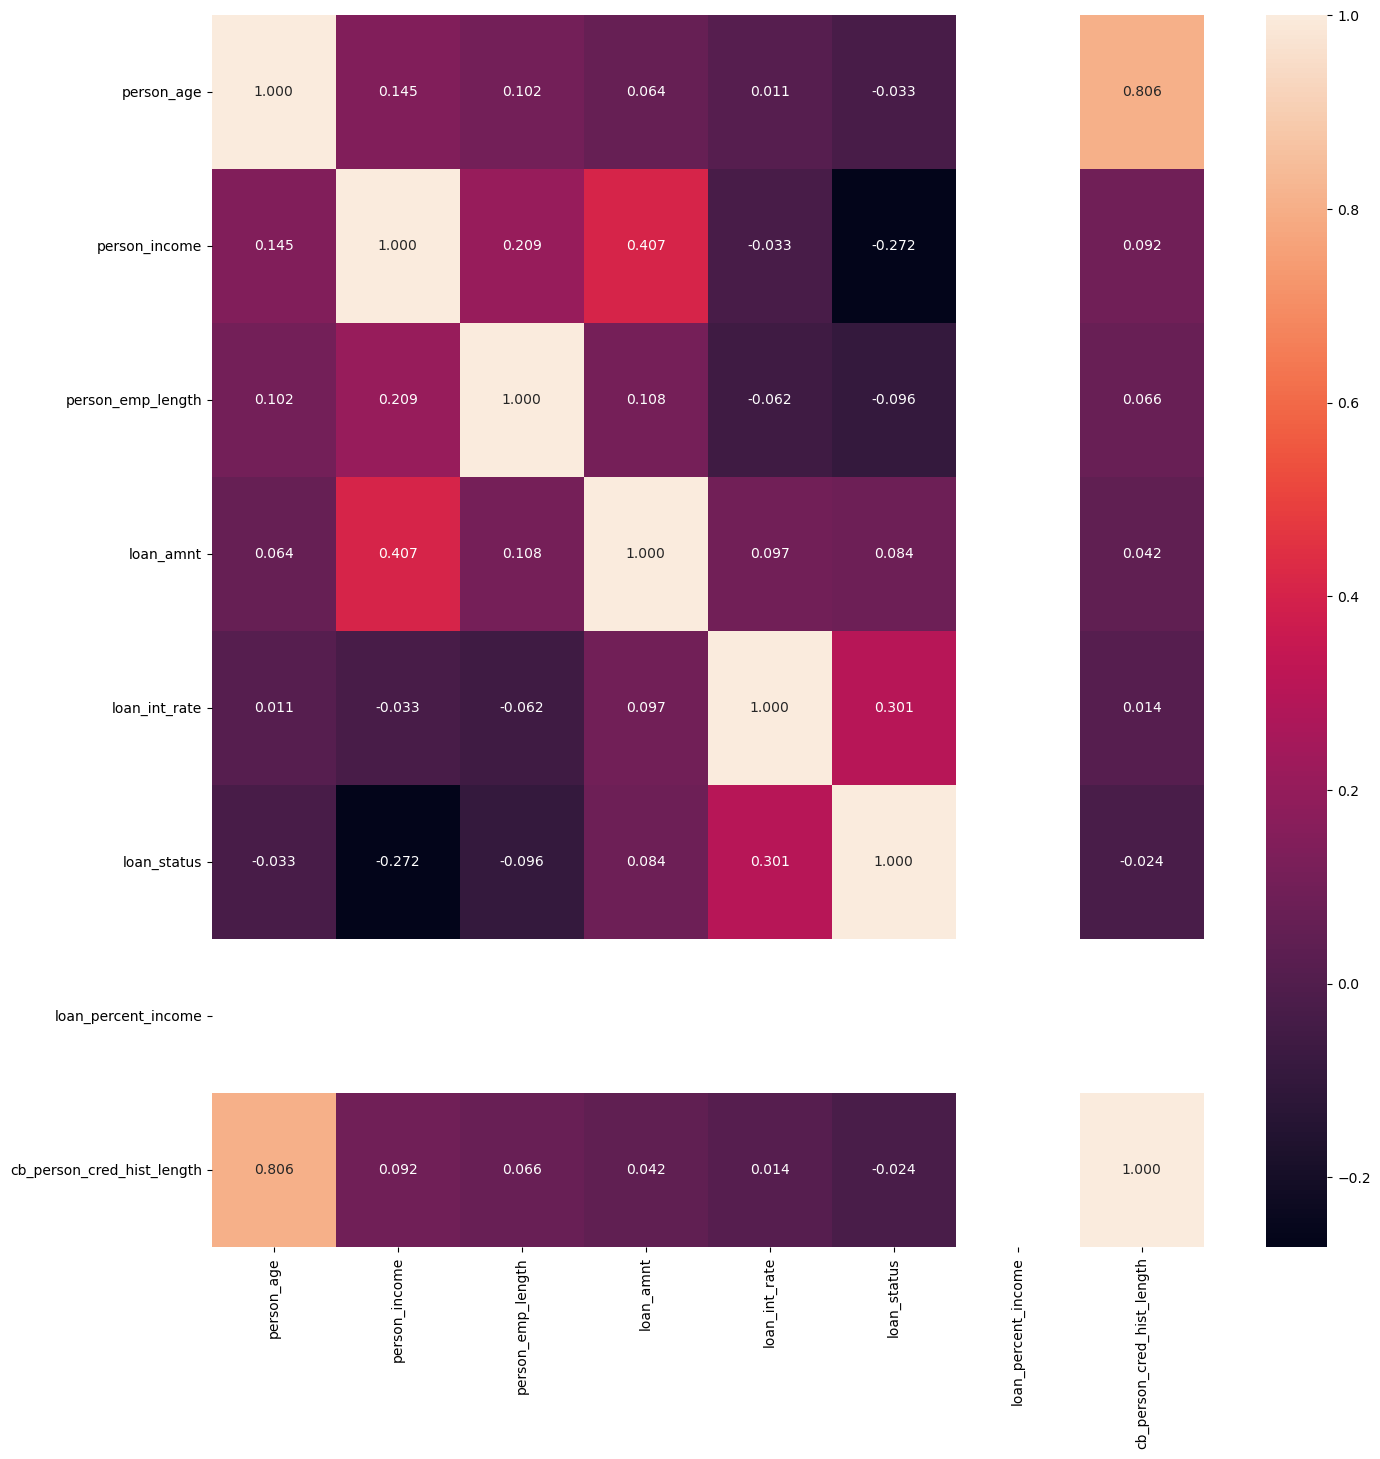

In [151]:
# heatmap of correlation between variables
fig, ax = plt.subplots(figsize=(16,16)) 
sns.heatmap(data=df.corr(method='spearman'), annot=True, ax=ax, fmt ='.3f')

<AxesSubplot:xlabel='loan_status', ylabel='count'>

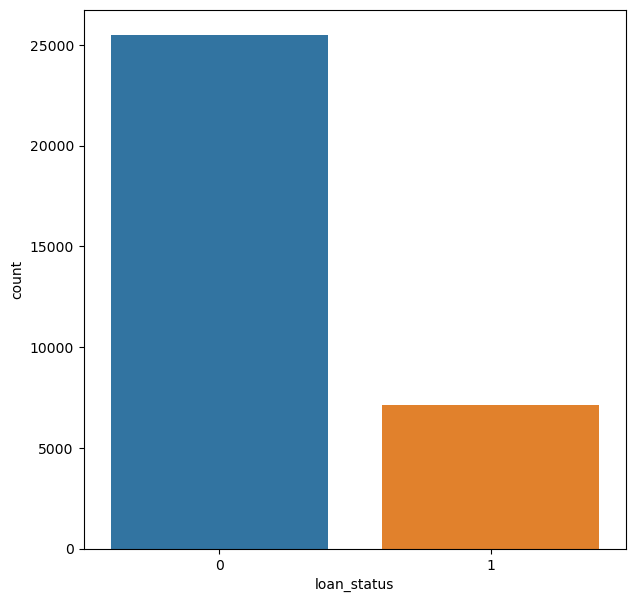

In [127]:
# loan status visualization
plt.figure(figsize=(7,7))
sns.countplot(x=df["loan_status"])

<AxesSubplot:xlabel='loan_status', ylabel='count'>

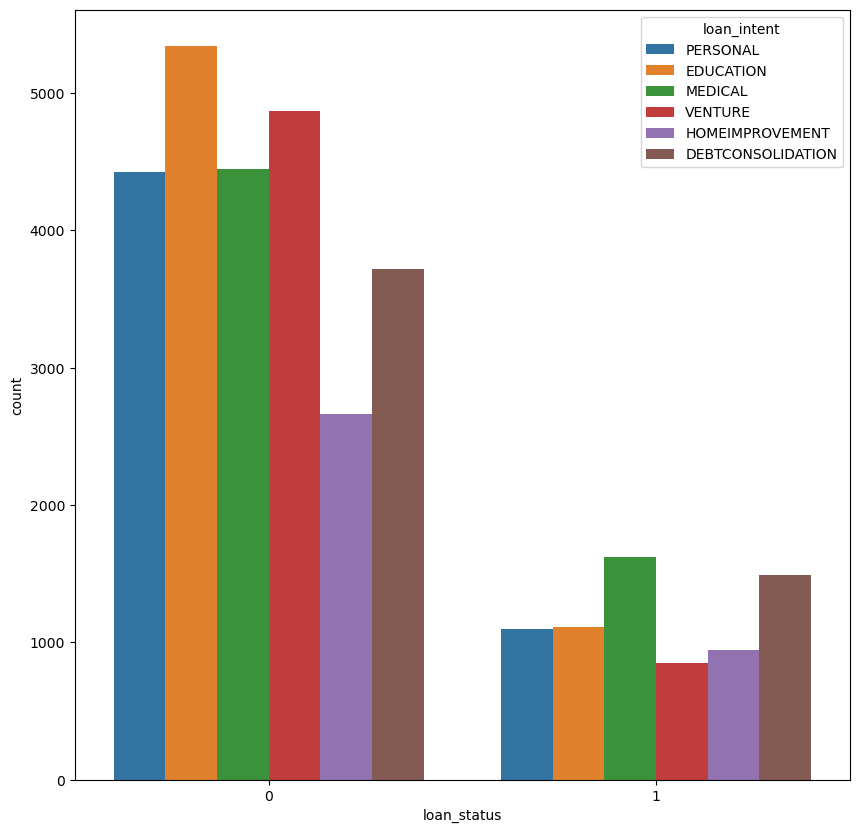

In [128]:
# loan status variable categorized by loan intent
plt.figure(figsize=(10,10))
sns.countplot(x=df["loan_status"], hue=df["loan_intent"])

In [129]:
# new numerical columns without loan_status
numerical_cols1 = [numname for numname in df.columns if df[numname].dtype in ['int64', 'float64']]
numerical_cols1.remove("loan_status")
numerical_cols1

['person_age',
 'person_income',
 'person_emp_length',
 'loan_amnt',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_cred_hist_length']

In [130]:
# function used to depict histogram/boxplot of numerical feature
def descriptive_summary_n(column):
    fig, axs = plt.subplots(1,2, figsize=(19,6))
    axs[0].hist(df[column]) #creating histogram plot
    axs[0].axvline(df[column].mean(), color='red', label=f"Mean: {round(df[column].mean(),2)}") #vertical line for mean of the distribution
    axs[0].axvline(df[column].median(), color='green', label=f"Median: {round(df[column].median(),2)}") #vertical line for median of the distribution
    axs[0].axvline(x=df[column].describe()[4],color='r', linestyle='--', label=f"25th percentile: {df[column].describe()[4]}") #vertical line for 25th percentile of the distribution
    axs[0].axvline(x=df[column].describe()[6],color='r', linestyle='--', label=f"75th percentile: {df[column].describe()[6]}") #vertical line for 75th percentile of the distribution
    axs[0].legend()
    sns.boxplot(data=df, x=column, ax=axs[1]) #creating boxplot
    axs[1].axvline(df[column].mean(), color='red') #vertical line for the mean of the distribution
    fig.suptitle(f"Histogram and Boxplot of {column}")
    plt.show()
    print(f"{df[column].describe().round(3)}\n")
    print(f"Range: {df[column].max() - df[column].min()}")
    print(f"Interquartile Range: {df[column].describe()[6] - df[column].describe()[4]}\n")
    print(f"Skewness: {skew(df[df[column].isna()==False][column], bias=True)}")
    print(f"Kurtosis: {kurtosis(df[df[column].isna()==False][column], bias=True)}")

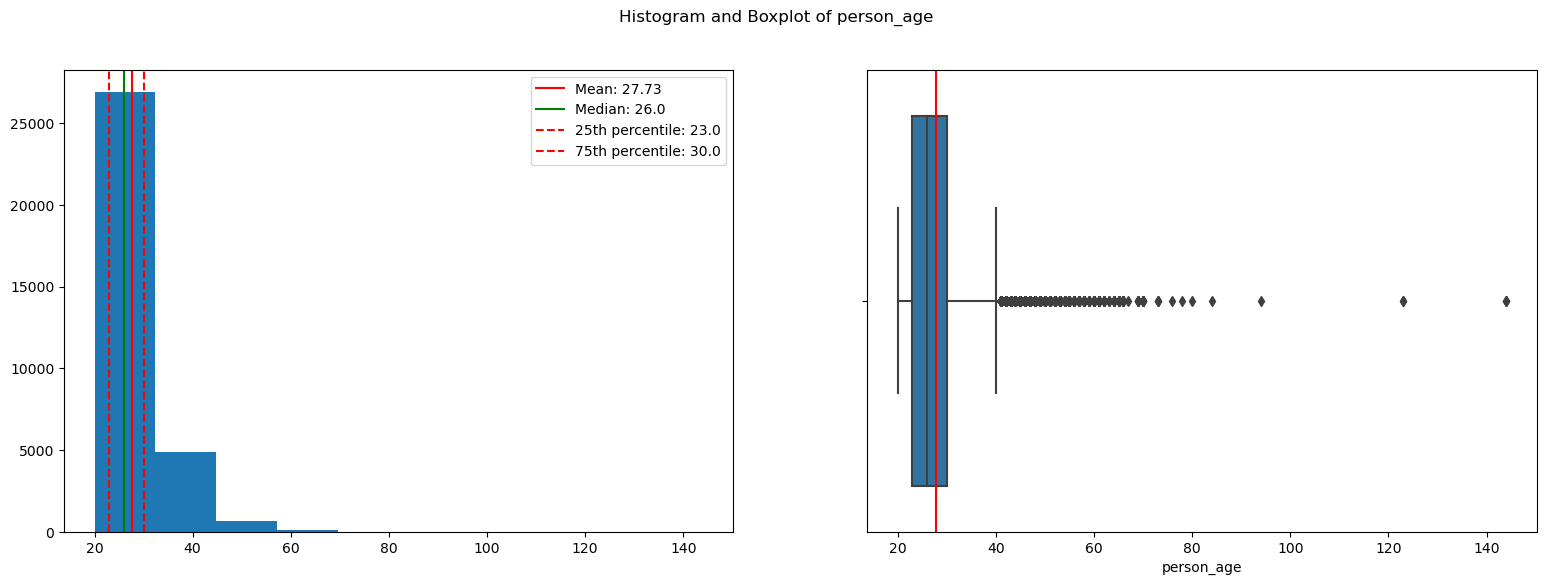

count    32581.000
mean        27.735
std          6.348
min         20.000
25%         23.000
50%         26.000
75%         30.000
max        144.000
Name: person_age, dtype: float64

Range: 124
Interquartile Range: 7.0

Skewness: 2.5812736796698657
Kurtosis: 18.557792324565625


In [131]:
descriptive_summary_n(numerical[0])

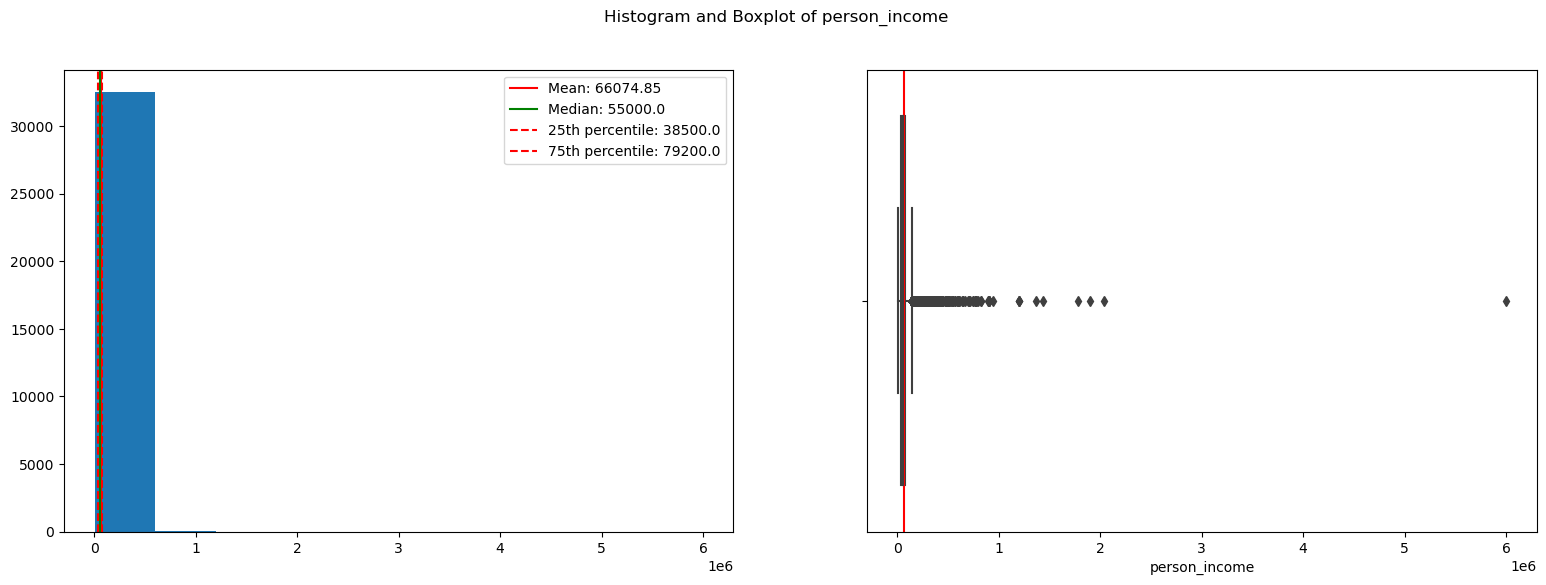

count      32581.000
mean       66074.848
std        61983.119
min         4000.000
25%        38500.000
50%        55000.000
75%        79200.000
max      6000000.000
Name: person_income, dtype: float64

Range: 5996000
Interquartile Range: 40700.0

Skewness: 32.86383572338852
Kurtosis: 2692.8592897449143


In [132]:
descriptive_summary_n(numerical[1])

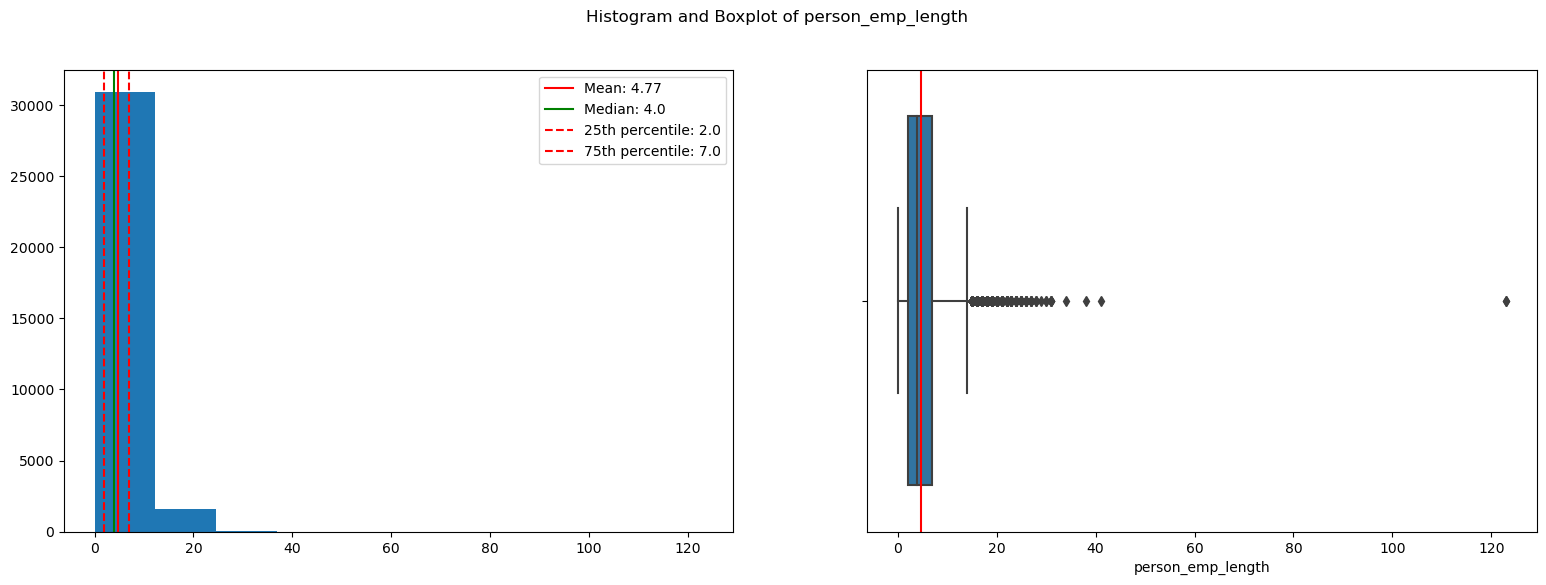

count    32581.000
mean         4.768
std          4.087
min          0.000
25%          2.000
50%          4.000
75%          7.000
max        123.000
Name: person_emp_length, dtype: float64

Range: 123
Interquartile Range: 5.0

Skewness: 2.662755854394022
Kurtosis: 44.995406687453816


In [133]:
descriptive_summary_n(numerical[2])

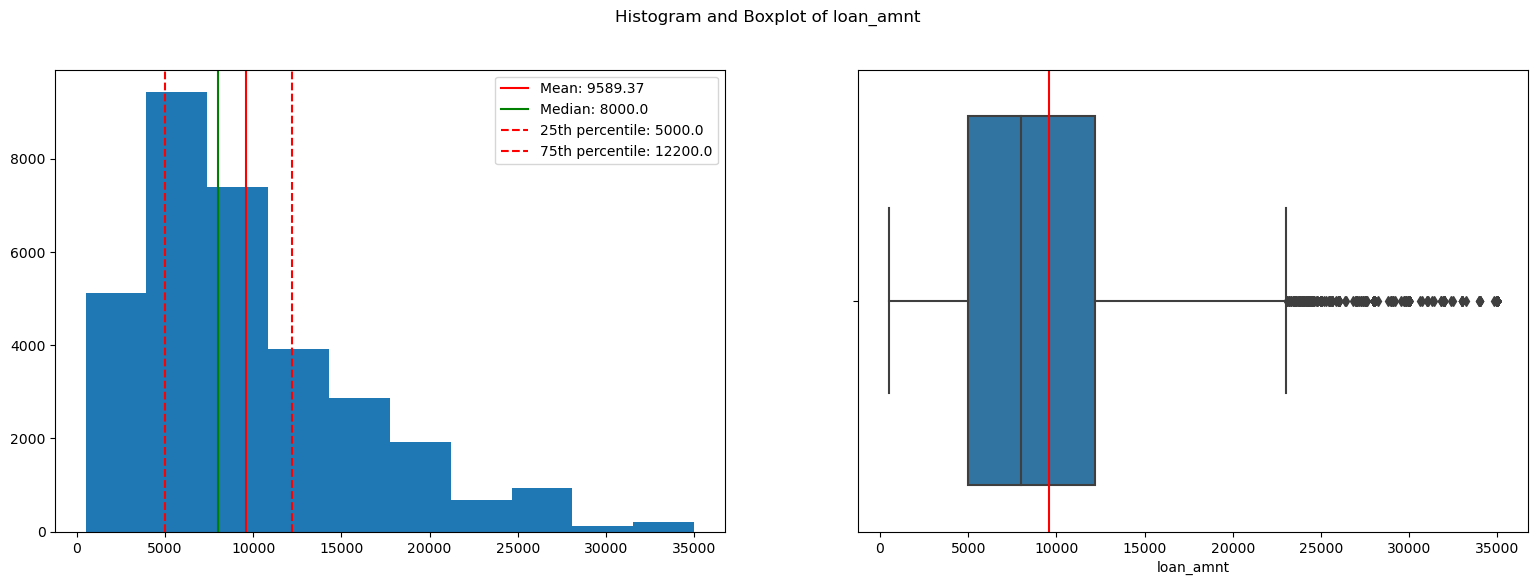

count    32581.000
mean      9589.371
std       6322.087
min        500.000
25%       5000.000
50%       8000.000
75%      12200.000
max      35000.000
Name: loan_amnt, dtype: float64

Range: 34500
Interquartile Range: 7200.0

Skewness: 1.192422526473502
Kurtosis: 1.4231627003417104


In [134]:
descriptive_summary_n(numerical[3])

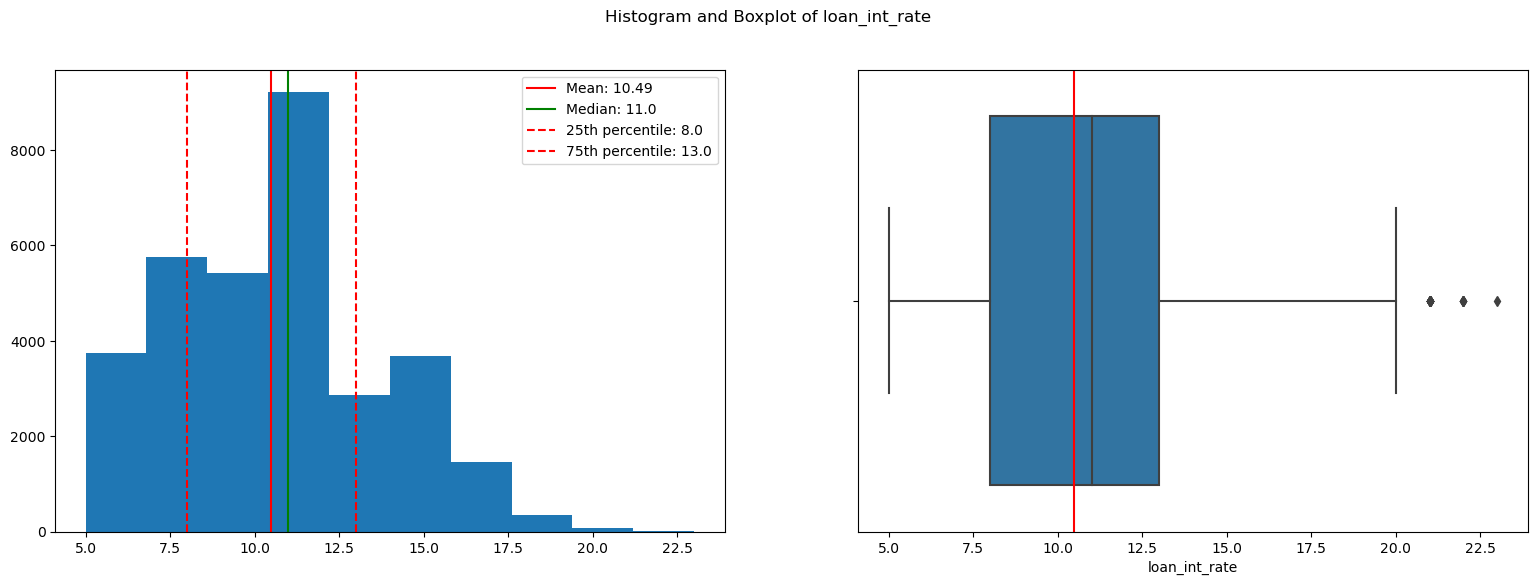

count    32581.000
mean        10.487
std          3.116
min          5.000
25%          8.000
50%         11.000
75%         13.000
max         23.000
Name: loan_int_rate, dtype: float64

Range: 18
Interquartile Range: 5.0

Skewness: 0.1894356353162571
Kurtosis: -0.4518301561769804


In [135]:
descriptive_summary_n(numerical[4])

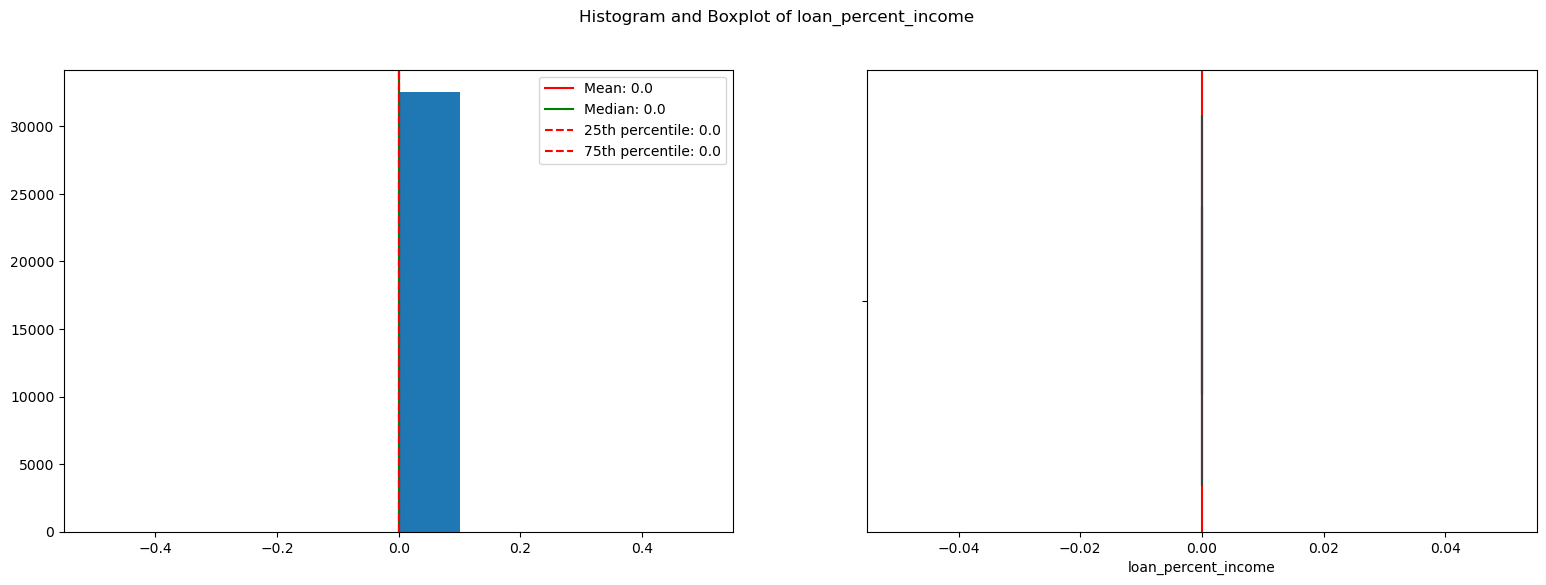

count    32581.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: loan_percent_income, dtype: float64

Range: 0
Interquartile Range: 0.0

Skewness: nan
Kurtosis: nan


In [136]:
descriptive_summary_n(numerical[5])

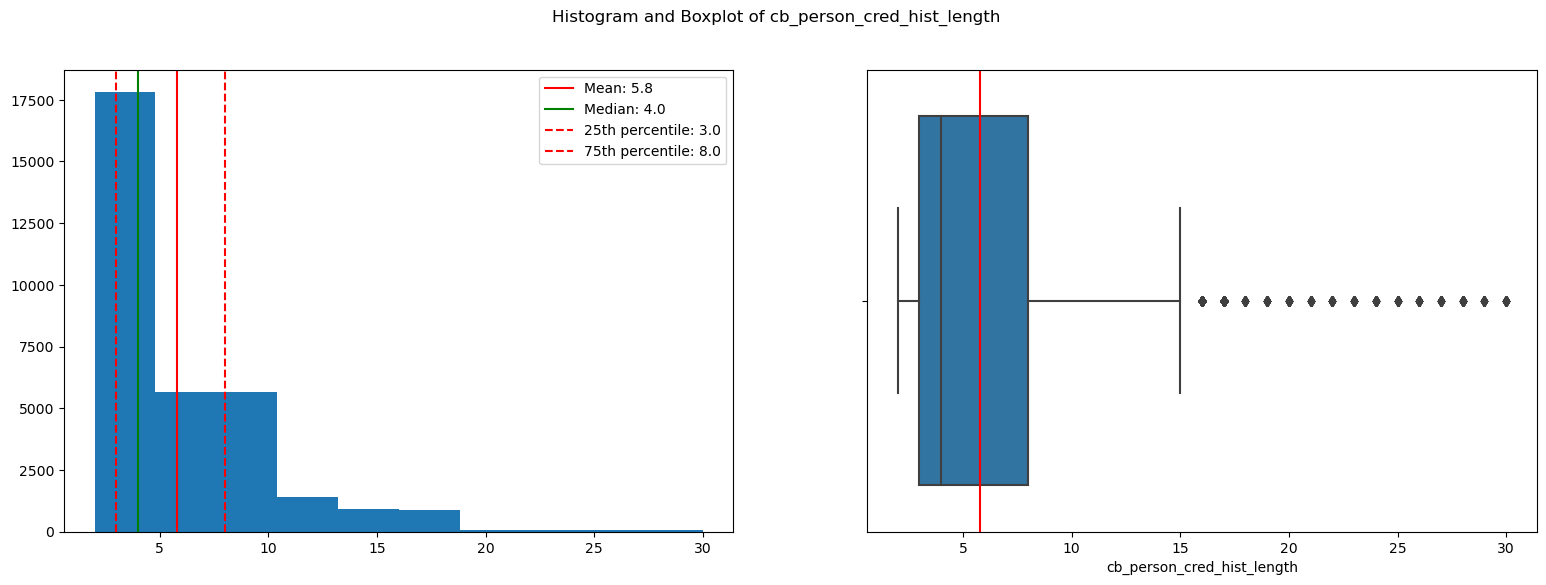

count    32581.000
mean         5.804
std          4.055
min          2.000
25%          3.000
50%          4.000
75%          8.000
max         30.000
Name: cb_person_cred_hist_length, dtype: float64

Range: 28
Interquartile Range: 5.0

Skewness: 1.6617136116084419
Kurtosis: 3.715439392280821


In [137]:
descriptive_summary_n(numerical[6])

In [138]:
categorical

['person_home_ownership',
 'loan_intent',
 'loan_grade',
 'loan_status',
 'cb_person_default_on_file']

In [139]:
# create test/train split
x = df.drop("loan_status", axis=1)
y = df.loan_status
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [140]:
x_train.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [141]:
for colname in x.select_dtypes("object"):
    x[colname], _ = x[colname].factorize()
discrete_features = x.dtypes == int

def make_mi_scores(x, y, discrete_features):
    mi_scores = mutual_info_regression(x, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=x.columns)


In [142]:
x.dtypes

person_age                    int64
person_income                 int64
person_home_ownership         int64
person_emp_length             int64
loan_intent                   int64
loan_grade                    int64
loan_amnt                     int64
loan_int_rate                 int64
loan_percent_income           int64
cb_person_default_on_file     int64
cb_person_cred_hist_length    int64
dtype: object

In [145]:
y.dtypes

dtype('int64')

In [147]:
numerical_transformer = SimpleImputer(strategy='constant')

categorical_cols = [catname for catname in x_train.columns if x_train[catname].nunique() < 10 and 
                        x_train[catname].dtype == "object"]

# pre-processing

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols1),
        ('cat', categorical_transformer, categorical_cols)
    ])

In [150]:
# best feature score
functions=[chi2,f_classif]
for i in functions:
    bestfeatures = SelectKBest(score_func=i, k=9)
    fit = bestfeatures.fit(x,y)
    dfscores = pd.DataFrame(fit.scores_)
    dfcolumns = pd.DataFrame(x.columns)
    #concat two dataframes for better visualization 
    featureScores = pd.concat([dfcolumns,dfscores],axis=1)
    featureScores.columns = ['Specs','Score']  #naming the dataframe columns
    print(i,'\n',featureScores.nlargest(10,'Score'))

<function chi2 at 0x120d0e9d0> 
                          Specs         Score
1                person_income  3.952699e+07
6                    loan_amnt  1.507865e+06
7                loan_int_rate  3.053742e+03
2        person_home_ownership  1.573518e+03
3            person_emp_length  7.710075e+02
5                   loan_grade  3.948243e+02
9    cb_person_default_on_file  1.843664e+02
4                  loan_intent  1.677571e+02
10  cb_person_cred_hist_length  2.225876e+01
0                   person_age  2.214629e+01
<function f_classif at 0x120d0e8b0> 
                          Specs        Score
7                loan_int_rate  3670.847263
2        person_home_ownership  1636.733370
9    cb_person_default_on_file  1080.177944
1                person_income   694.268530
5                   loan_grade   581.048727
6                    loan_amnt   365.820380
3            person_emp_length   221.531671
4                  loan_intent   139.862601
0                   person_age    15.2

/Users/afifmazhar/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [8] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/afifmazhar/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


DecisionTreeClassifier() [0.0477133  0.27726724 0.10240788 0.06344062 0.08211738 0.08675807
 0.15721519 0.13788232 0.         0.00839813 0.03679987]


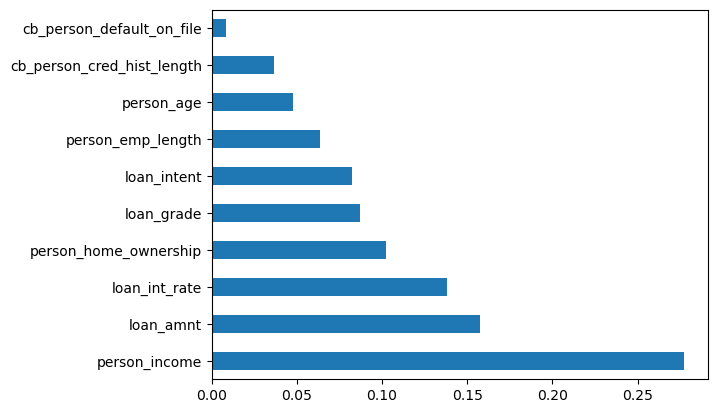

ExtraTreesClassifier() [0.08667904 0.21199928 0.06943864 0.09613554 0.08238603 0.11253987
 0.14554917 0.10076301 0.         0.02344368 0.07106575]


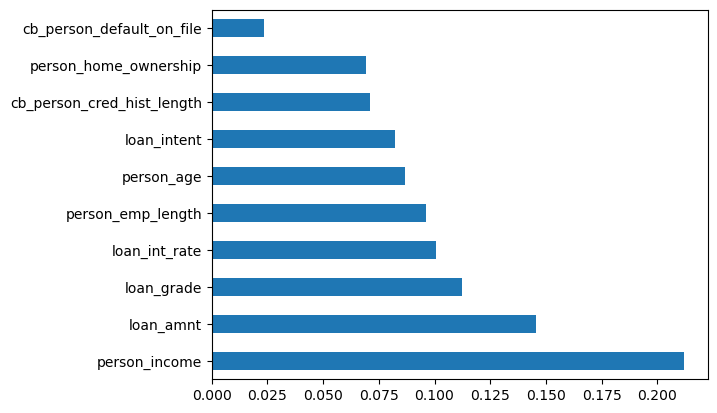

RandomForestClassifier() [0.06036899 0.26534063 0.07186428 0.07443171 0.08136327 0.10185556
 0.17950655 0.10341716 0.         0.01293139 0.04892046]


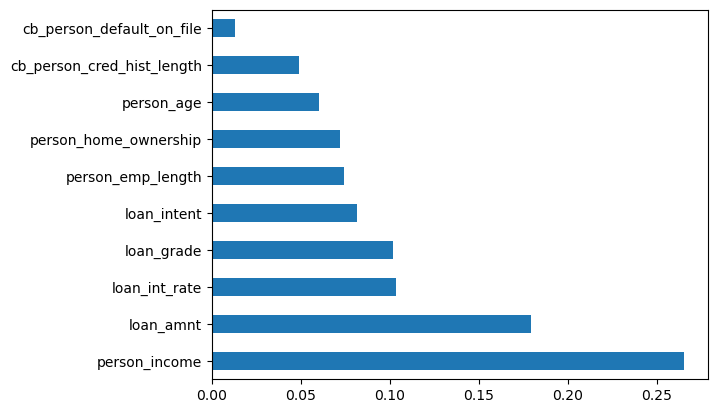

/Users/afifmazhar/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/afifmazhar/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[23:08:52] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None) [0.02601727 0.10444863 0.2220739  0.04411172 0.1088253  0.15875298
 0.09091033 0.19520894 0.         0.0305828

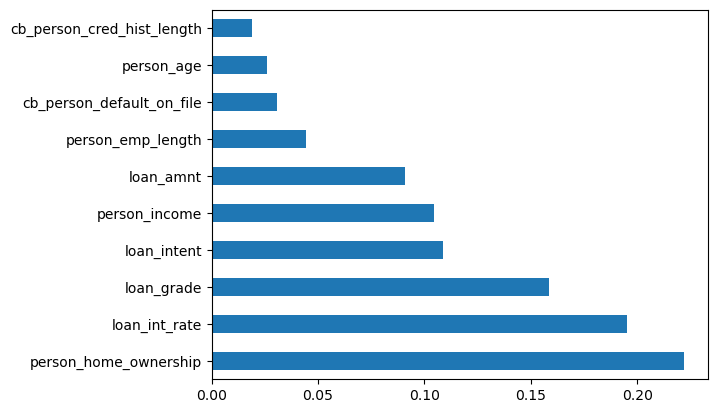

In [148]:
scaler = StandardScaler()
classifiers=[
        DecisionTreeClassifier(),
        ExtraTreesClassifier(),
        RandomForestClassifier(),
        XGBClassifier()
]

for i in classifiers:
    model = i 
    model.fit(x,y)
    print(model,model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers#plot graph of feature importances for better visualization
    feat_importances = pd.Series(model.feature_importances_, index=x.columns)
    feat_importances.nlargest(10).plot(kind='barh')
    plt.show()

In [155]:
classifier=[
    KNeighborsClassifier(3),
    SVC(kernel="rbf"),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    SGDClassifier(),
    XGBClassifier(),
    GaussianNB(),
    DecisionTreeClassifier(criterion='gini',random_state=0)]
for i in classifier:
    classifier_pipeline = Pipeline([('transformer', scaler), ('estimator', i)])
    kfold = model_selection.ShuffleSplit(n_splits=10, test_size=10, random_state=0)
    results = model_selection.cross_val_score(classifier_pipeline, x, y, cv=kfold)
    print("USING ALL VARIABLES",i)
    print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))
    results
    plt.show()
for i in classifier:
    classifier_pipeline = Pipeline([('transformer', scaler), ('estimator', i)])
    kfold = model_selection.ShuffleSplit(n_splits=10, test_size=10, random_state=0)
    results = model_selection.cross_val_score(classifier_pipeline, x.drop(["cb_person_default_on_file","cb_person_cred_hist_length","person_age"],axis=1), y, cv=kfold)
    print("USING IMPORTANT VARIABLES",i)
    print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))
    results
    plt.show()

/Users/afifmazhar/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/afifmazhar/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will n

USING ALL VARIABLES KNeighborsClassifier(n_neighbors=3)
Accuracy: 84.000% (8.000%)
USING ALL VARIABLES SVC()
Accuracy: 89.000% (9.434%)
USING ALL VARIABLES RandomForestClassifier()
Accuracy: 91.000% (9.434%)
USING ALL VARIABLES AdaBoostClassifier()
Accuracy: 89.000% (5.385%)
USING ALL VARIABLES SGDClassifier()
Accuracy: 84.000% (10.198%)
[23:35:12] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/afifmazhar/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/afifmazhar/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:35:14] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/afifmazhar/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:35:17] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/afifmazhar/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:35:19] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/afifmazhar/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:35:22] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/afifmazhar/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:35:24] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/afifmazhar/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:35:26] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/afifmazhar/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:35:28] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/afifmazhar/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:35:30] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/afifmazhar/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:35:33] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
USING ALL VARIABLES XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None,
              enable_categorical=False, gamma=None, gpu_id=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, reg_alpha=None,
              reg_lambda=None, scale_pos_weight=None, subsample=None,
              tree_method=None, validate_parameters=None, verbosity=None)
Accuracy: 92.000% (7.483%)
USING ALL VARIA

/Users/afifmazhar/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/afifmazhar/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will n

USING IMPORTANT VARIABLES KNeighborsClassifier(n_neighbors=3)
Accuracy: 88.000% (11.662%)
USING IMPORTANT VARIABLES SVC()
Accuracy: 89.000% (9.434%)
USING IMPORTANT VARIABLES RandomForestClassifier()
Accuracy: 90.000% (10.000%)
USING IMPORTANT VARIABLES AdaBoostClassifier()
Accuracy: 89.000% (5.385%)
USING IMPORTANT VARIABLES SGDClassifier()
Accuracy: 85.000% (12.845%)
[23:40:35] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/afifmazhar/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/afifmazhar/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:40:37] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/afifmazhar/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:40:39] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/afifmazhar/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:40:41] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/afifmazhar/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:40:42] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/afifmazhar/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:40:44] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/afifmazhar/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:40:46] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/afifmazhar/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:40:48] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/afifmazhar/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:40:50] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/afifmazhar/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:40:52] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
USING IMPORTANT VARIABLES XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None,
              enable_categorical=False, gamma=None, gpu_id=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, reg_alpha=None,
              reg_lambda=None, scale_pos_weight=None, subsample=None,
              tree_method=None, validate_parameters=None, verbosity=None)
Accuracy: 92.000% (7.483%)
USING IMP